P is equal to 
[[5.8035152  4.88589022 1.6766512 ]
 [3.05527836 0.37969297 7.59842972]
 [8.84466748 1.33502828 7.43364367]] 

 M. is equal to 
[5.68484492 3.36594472 3.00199212]
step size is  = 0.08990932191683572
error is  = 0.07341065393862661
 M. is equal to 
[4.76097347 2.28196013 3.55478383]
step size is  = 0.05058354417232846
error is  = 0.03758791981168875
 M. is equal to 
[2.48138029 3.93411574 2.56821716]
step size is  = -0.0056136383524598675
error is  = 0.004924723399717401
Center  = [5.90378142 2.57757854 5.02599149]


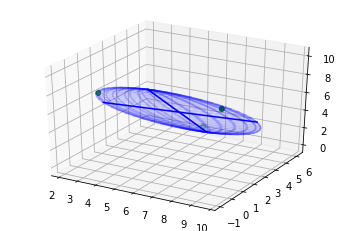

In [70]:


from __future__ import division
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sys
import numpy as np
from numpy import linalg
from random import random

class EllipsoidTool:
    def __init__(self): pass
    
    def getMinVolEllipse(self, P=None, tolerance=0.01):
        """ Find the minimum volume ellipsoid which holds all the points
        
        Returns:
        (center, radii, rotation)
        
        """
        (N, d) = np.shape(P)
        d = float(d)
    
        # Q will be our working array
        Q = np.vstack([np.copy(P.T), np.ones(N)]) 
        QT = Q.T
        
        # initializations
        err = 1.0 + tolerance
        u = (1.0 / N) * np.ones(N)

        # Khachiyan Algorithm
        while err > tolerance:
            V = Q @ np.diag(u) @ QT
            M = np.diag(QT @ linalg.inv(V) @ Q) # M the diagonal vector of an NxN matrix
            print(f" M. is equal to \n{M}")
            j = np.argmax(M) 
            maximum = M[j]
            step_size = (maximum - d - 1.0) / ((d + 1.0) * (maximum - 1.0))
            print(f"step size is  = {step_size}")
            new_u = (1.0 - step_size) * u
            new_u[j] += step_size
            err = np.linalg.norm(new_u - u)
            print(f"error is  = {err}")
            u = new_u

        # center of the ellipse 
        center = np.dot(P.T, u)
        print(f"Center  = {center}")
        # the A matrix for the ellipse
        A = linalg.inv(
                       np.dot(P.T, np.dot(np.diag(u), P)) - 
                       np.array([[a * b for b in center] for a in center])
                       ) / d
                       
        # Get the values we'd like to return
        U, s, rotation = linalg.svd(A)
        radii = 1.0/np.sqrt(s)  
        
        return (center, radii, rotation)

    def getEllipsoidVolume(self, radii):
        """Calculate the volume of the blob"""
        return 4./3.*np.pi*radii[0]*radii[1]*radii[2]

    def plotEllipsoid(self, center, radii, rotation, ax=None, plotAxes=False, cageColor='b', cageAlpha=0.2):
        """Plot an ellipsoid"""
        make_ax = ax == None
        if make_ax:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            
        u = np.linspace(0.0, 2.0 * np.pi, 100)
        v = np.linspace(0.0, np.pi, 100)
        
        # cartesian coordinates that correspond to the spherical angles:
        x = radii[0] * np.outer(np.cos(u), np.sin(v))
        y = radii[1] * np.outer(np.sin(u), np.sin(v))
        z = radii[2] * np.outer(np.ones_like(u), np.cos(v))
        # rotate accordingly
        for i in range(len(x)):
            for j in range(len(x)):
                [x[i,j],y[i,j],z[i,j]] = np.dot([x[i,j],y[i,j],z[i,j]], rotation) + center
    
        if plotAxes:
            # make some purdy axes
            axes = np.array([[radii[0],0.0,0.0],
                             [0.0,radii[1],0.0],
                             [0.0,0.0,radii[2]]])
            # rotate accordingly
            for i in range(len(axes)):
                axes[i] = np.dot(axes[i], rotation)
    
    
            # plot axes
            for p in axes:
                X3 = np.linspace(-p[0], p[0], 100) + center[0]
                Y3 = np.linspace(-p[1], p[1], 100) + center[1]
                Z3 = np.linspace(-p[2], p[2], 100) + center[2]
                ax.plot(X3, Y3, Z3, color=cageColor)
    
        # plot ellipsoid
        ax.plot_wireframe(x, y, z,  rstride=4, cstride=4, color=cageColor, alpha=cageAlpha)
        
        if make_ax:
            plt.show()
            plt.close(fig)
            del fig
        
if __name__ == "__main__":
    # make 100 random points
    P = np.reshape([random()*10 for i in range(9)],(3,3))
    print(f"P is equal to \n{P} \n")

    # find the ellipsoid
    ET = EllipsoidTool()
    (center, radii, rotation) = ET.getMinVolEllipse(P, .01)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # plot points
    ax.scatter(P[:,0], P[:,1], P[:,2], color='g', marker='.', s=100)

    # plot ellipsoid
    ET.plotEllipsoid(center, radii, rotation, ax=ax, plotAxes=True)
    
    plt.show()
    plt.close(fig)
    del fig